# Assignment 1

## Statement of Problem

Solve the two dimensional Laplace's equation of the following form using the finite element method:

\begin{equation}
\epsilon_{xj}\frac{\partial^2\phi(x,y)}{\partial x^2} + \epsilon_{yj}\frac{\partial^2\phi(x,y)}{\partial y^2} = 0
\end{equation}

where $\epsilon_{xj}$ and $\epsilon_{yj}$ are the relative permitivities in the x and y directions, respectively, of electrically anisotropic substrate of $j-th$ region and they are the same for isotropic material in the structure. Show the potential distribution over the cross section of the microstrip line of figure below, use $5 \ V$ on the strip.

## Device Dimension

In [1]:
cm = 1e-2; % centimeter
l = 1.2*cm; % length of the device
h_1 = 0.2 * cm; % height of the air region
h_2 = 0.1 * cm; % height of the dielectric region
W = 0.1 * cm; % width of the microstrip
T = 0.05*cm; % thickness of the metal strip
epsilon_0 = 8.85418782e-12; % permittivity of free space
eps = 12.9 * epsilon_0; % permittivity of dielectric

## Visualization

In [2]:
imatlab_export_fig('print-png') 

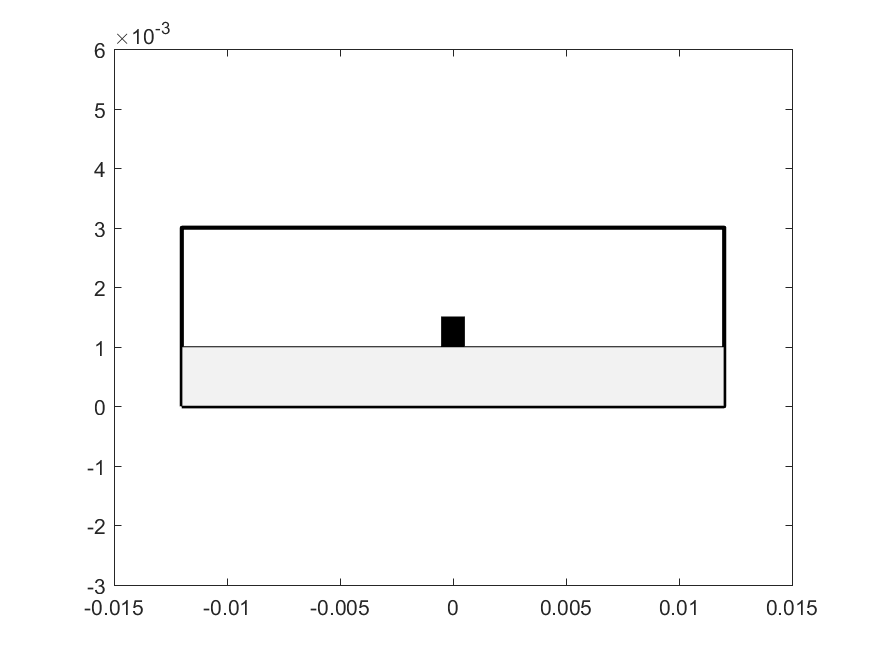

In [13]:
H = h_1 + h_2; % total height of the microstrip
n = 10; %number of samples
dx = 0.05 * cm;
%x = linspace(-l,l,n);
X = -l:dx:l;
Y =  0: dx: H;

plot([X(1),X(1),X(end),X(end),X(1)], ...
     [Y(1),Y(end),Y(end),Y(1),Y(1)],'k', 'linewidth',2)
patch([X(1),X(1),X(end),X(end),X(1)], [Y(1),h_2,h_2,Y(1),Y(1)], [0.95,0.95,0.95])
patch([-W,-W,W,W,-W]/2, [h_2,h_2+T,h_2+T,h_2,h_2], 'k')

axis([X(1)-0.3*cm, X(end)+0.3 *cm, Y(1)-0.3*cm, Y(end)+0.3*cm])

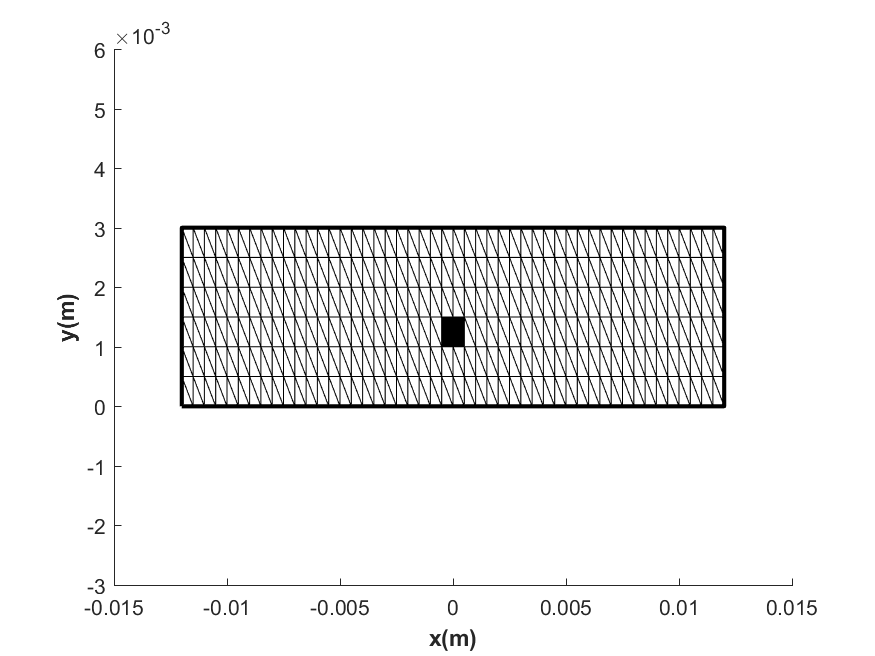

In [ ]:
[x,y]=ndgrid(X,Y); % matlab forms χ and у lists
tri = delaunay(x,y);

figure
hold on
plot([X(1),X(1),X(end),X(end),X(1)], ...
     [Y(1),Y(end),Y(end),Y(1),Y(1)],'k', 'linewidth',2)
% patch([X(1),X(1),X(end),X(end),X(1)], [Y(1),h_2,h_2,Y(1),Y(1)], [0.95,0.95,0.95])
% patch([-W,-W,W,W,-W]/2, [h_2,h_2+T,h_2+T,h_2,h_2], 'k')
axis([X(1)-0.3*cm, X(end)+0.3 *cm, Y(1)-0.3*cm, Y(end)+0.3*cm])
tt = [tri, tri(:,1)];
p = [x(:), y(:)];
for i = 1:length(x(:))
    %text(p(i,1),p(i,2),num2str(i),'fontsize',6,'HorizontalAlignment','center')
end
for i = 1:size(tt,1)
    for j = 1:3               
        %disp([p(tt(i,j),:);p(tt(i,j+1),:)])
        pp = [p(tt(i,j),:);p(tt(i,j+1),:)];
        plot(pp(:,1),pp(:,2), 'k')
    end
end

for i = 1:length(tt)
    px = mean(p(tri(i,:),1));
    py = mean(p(tri(i,:),2));
    if h_2 + T > py && py > h_2 && abs(px) < (W/2)
         patch(p(tri(i,:),1), p(tri(i,:),2),'k')
    end
end

xlabel('x(m)','fontweight','bold')
ylabel('y(m)','fontweight','bold')

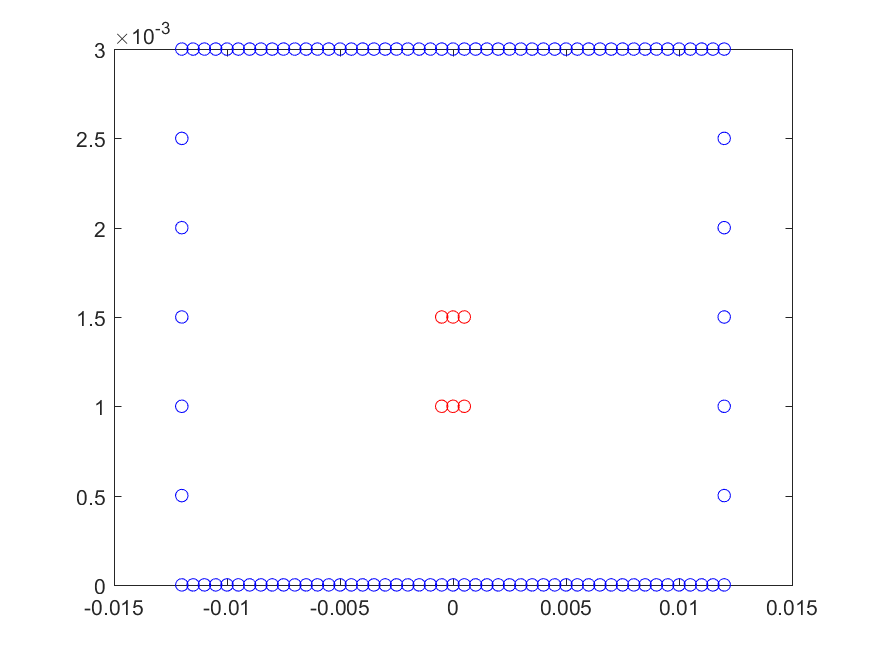

In [27]:
xx = length(X);
yy = length(Y);
boundary_X = [X(1) * ones(1,yy) , X, X(end) * ones(1,yy), flip(X)]; 
boundary_Y = [Y, Y(end)*ones(1,xx), Y, Y(1)*ones(1,xx)];
plot(boundary_X, boundary_Y,'bo')
hold on
m_x = X(abs(X) <= (W/2 + dx / 100));
m_y = Y(and(Y >= h_2 , Y <= h_2 + T));
m_xx = length(m_x);
m_yy = length(m_y);
bb_X = [m_x(1) * ones(1,m_yy) , m_x, m_x(end) * ones(1,m_yy), flip(m_x)];
bb_Y = [m_y, m_y(end)*ones(1,m_xx), m_y, m_y(1)*ones(1,m_xx)];
plot(bb_X,bb_Y,'ro')

In [23]:
% abs(X)<=W/2
format long




ans =

  1×7 logical array

   0   0   0   0   1   1   0



# Assignment 2

## Statement of Problem

Find the change in refractive index due to electro-optic(EO) effect for (a) transverse EO modulator of GaAs, (b) Longitudinal EO modulaton of GaAs. 